In [1]:
import pandas as pd

In [2]:
import csv
import seaborn as sns
import numpy as np

In [3]:
df_last = pd.read_csv("주택.csv", encoding="euc-kr", engine="python")

In [4]:
df_last

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN


In [6]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors="coerce")

In [8]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3

In [9]:
df_last["규모구분"].str

In [10]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "")

In [11]:
df_last["전용면적"] = df_last["전용면적"].str.strip()

In [12]:
df_last = df_last.drop(["규모구분", "분양가격(㎡)"], axis=1)

In [13]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [14]:
g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()

In [15]:
titanic = sns.load_dataset("titanic")

In [16]:
df = titanic.loc[:, ["age", "sex", "class", "fare", "survived"]]

In [17]:
pdf1 = pd.pivot_table(df, 
                      index="class",
                       columns="sex",
                     values = "age",
                     aggfunc="mean")

In [18]:
pdf1

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [19]:
pdf2 = pd.pivot_table(df, 
                      index="class",
                       columns="sex",
                     values = "survived",
                     aggfunc=["mean", "sum"])

In [20]:
pdf2

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [21]:
pdf3 = pd.pivot_table(df, 
                      index=["class", "sex"],
                       columns="survived",
                     values = ["age", "fare"],
                     aggfunc=["mean", "max"])

In [22]:
pdf3

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [23]:
pd.pivot_table(df_last, index=["지역명"], values=["평당분양가격"], aggfunc="mean")

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [24]:
pd.pivot_table(df_last, index="전용면적", values="평당분양가격")

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [25]:
pd.pivot_table(df_last, index="전용면적", values="평당분양가격").round()

,평당분양가격
전용면적,
102㎡~,11518.0
60㎡,10375.0
60㎡~85㎡,10271.0
85㎡~102㎡,11098.0
전체,10276.0


In [26]:
p = pd.pivot_table(df_last, index=["연도", "지역명"], values="평당분양가격")

In [27]:
p

평당분양가격
연도   지역명              
2015 강원    7188.060000
     경기   11060.940000
     경남    8459.220000
     경북    7464.160000
     광주    7916.700000
...                ...
2019 전남    8219.275862
     전북    8532.260000
     제주   11828.469231
     충남    8748.840000
     충북    7970.875000

[85 rows x 1 columns]

In [45]:
import matplotlib.pyplot as plt
import matplotlib as mpl


In [51]:
plt.rc("font", family="Malgun Gothic")

In [52]:
import seaborn as sns

In [53]:
%matplotlib inline

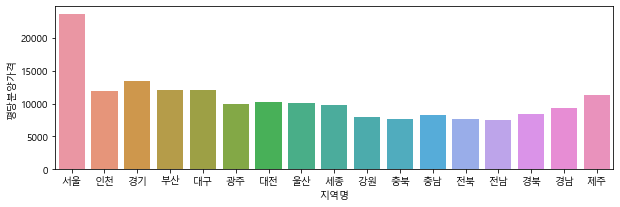

In [54]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_last, x="지역명", y="평당분양가격",ci=None)

In [55]:
dict1 = {
    "년": [2017, 2018],
    "F": [0.380887, 0.372857],
    "M": [0.619113, 0.627143]
}

In [56]:
df = pd.DataFrame(dict1)

In [57]:
df

,년,F,M
0,2017,0.380887,0.619113
1,2018,0.372857,0.627143


In [58]:
df = df.set_index("년")

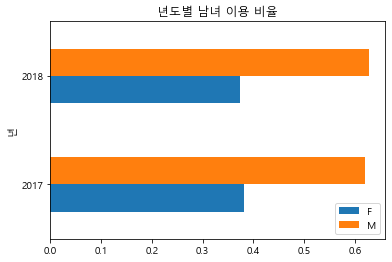

In [59]:
df.plot(kind="barh", title="년도별 남녀 이용 비율")

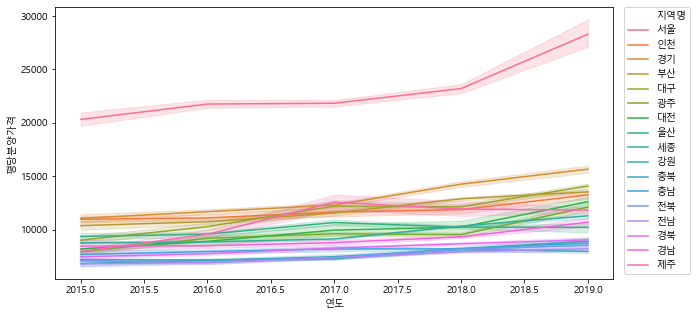

In [60]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

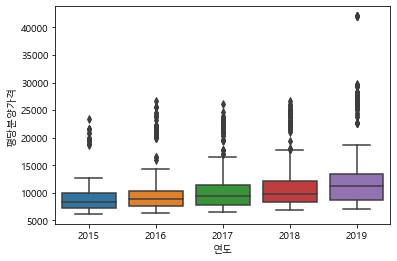

In [61]:
sns.boxplot(data=df_last, x="연도", y="평당분양가격")

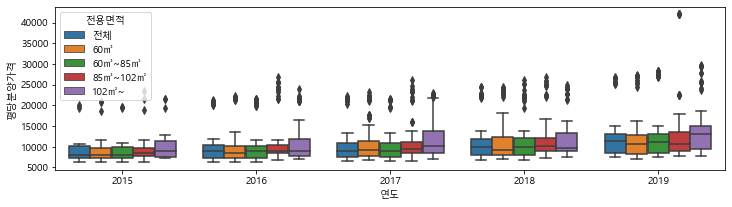

In [62]:
plt.figure(figsize=(12,3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

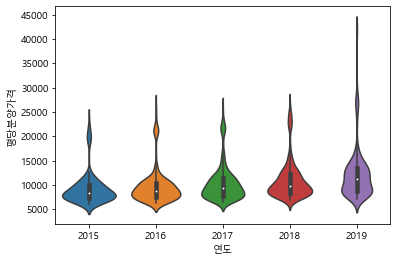

In [63]:
sns.violinplot(data=df_last, x="연도", y="평당분양가격")

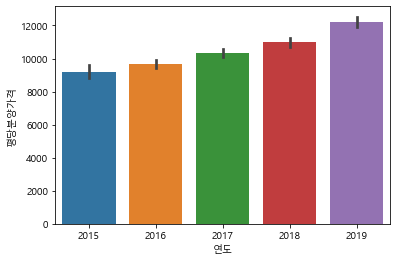

In [64]:
sns.barplot(data=df_last, x="연도", y="평당분양가격")

In [66]:
df = pd.read_csv("auto-mpg.csv", header=None)

In [67]:
df.columns = [
    "mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration",
    "model year", "origin", "name"
]

In [68]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [69]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [70]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [71]:
df.shape

(398, 9)

In [72]:
df.info()
#통계에서는 실수를 연속값, 정수는 이산값이라고 함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [74]:
df.mpg.dtypes

dtype('float64')

In [75]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [76]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [78]:
df.describe(include="all")[["name", "origin"]]

,name,origin
count,398,398.000000
unique,305,NaN
top,ford pinto,NaN
freq,6,NaN
mean,NaN,1.572864
std,NaN,0.802055
min,NaN,1.000000
25%,NaN,1.000000
50%,NaN,1.000000
75%,NaN,2.000000


In [79]:
df.describe(include="all")[["name", "horsepower"]]

,name,horsepower
count,398,398
unique,305,94
top,ford pinto,150.0
freq,6,22
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN


In [80]:
df.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
name            398
dtype: int64

In [81]:
df["origin"]

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: int64

In [82]:
df["origin"].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [83]:
df.mean()

mpg               23.514573
cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64

In [84]:
df["mpg"].mean()

23.514572864321615

In [85]:
df[["mpg", "weight"]].mean()

mpg         23.514573
weight    2970.424623
dtype: float64

In [86]:
df.median()

mpg               23.0
cylinders          4.0
displacement     148.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [87]:
df["mpg"].median()

23.0

In [88]:
df["mpg"].max()

46.6

In [90]:
df.max()

mpg                         46.6
cylinders                      8
displacement                 455
horsepower                     ?
weight                      5140
acceleration                24.8
model year                    82
origin                         3
name            vw rabbit custom
dtype: object

In [91]:
df.min()

mpg                                   9
cylinders                             3
displacement                         68
horsepower                        100.0
weight                             1613
acceleration                          8
model year                           70
origin                                1
name            amc ambassador brougham
dtype: object

In [92]:
df["mpg"].min()

9.0